In [1]:
# from bs4 import BeautifulSoup as bs
import requests
import datetime, time
import pickle

import pandas as pd
import numpy as np

import os
import shutil

import matplotlib.pyplot as plt

In [2]:
def read_csv(dir, file_col):
# 데이터 로드
    df_col = []
    for i, fname in enumerate(file_col):
        df_col.append(pd.read_csv(dir+fname))
    
    return df_col

In [3]:
def norm(x):
    _max = x.max()
    _min = x.min()
    _denom = _max - _min
    return (x - _min) / _denom

In [4]:
def sort_values_csv(df_col):
    for i, fn in enumerate(df_col):
        fn = fn.sort_values('time')
        fn.set_index('time', inplace=True)
        fn = fn.loc['09:10:00':'15:20:00']
        fn['change(%)'] = norm(fn['change(%)'])
        df_col[i] = fn
    
    return df_col

In [5]:
def plot_trend(df_col):
    for i, fn in enumerate(df_col):
        plt.plot(fn.index, fn['change(%)'])
    
    return

In [6]:
dir = 'data/stocks/daily_price/'
csv1 = ["005380_hyunmotor_10min_price_20220620.csv", "005380_hyunmotor_10min_price_20220621.csv",
       "005380_hyunmotor_10min_price_20220622.csv", "005380_hyunmotor_10min_price_20220623.csv",
       "005380_hyunmotor_10min_price_20220624.csv",
       "005380_hyunmotor_10min_price_20220627.csv", "005380_hyunmotor_10min_price_20220628.csv",
       "005380_hyunmotor_10min_price_20220629.csv", "005380_hyunmotor_10min_price_20220630.csv",
       "005380_hyunmotor_10min_price_20220701.csv"]

In [7]:
df = read_csv(dir, csv1)
df = sort_values_csv(df)

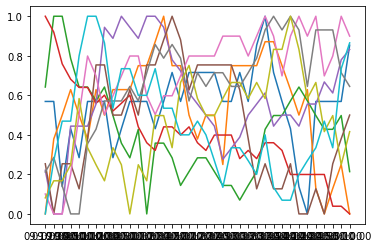

In [8]:
plot_trend(df)